# LINK FOR THE VIDEO PRESENTATION BELOW
https://youtu.be/TYk0Au3Cri4

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np
import itertools
import matplotlib.cm as cm
from networkx.algorithms.community import girvan_newman
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import defaultdict
from itertools import combinations
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
from networkx.algorithms.community import modularity
import community as community_louvain

file_path = "C:\\Bayes Business School\\Network Analytics//email-univ.edges"

# Create a new graph from the edge list
G = nx.read_edgelist(file_path, nodetype=int)

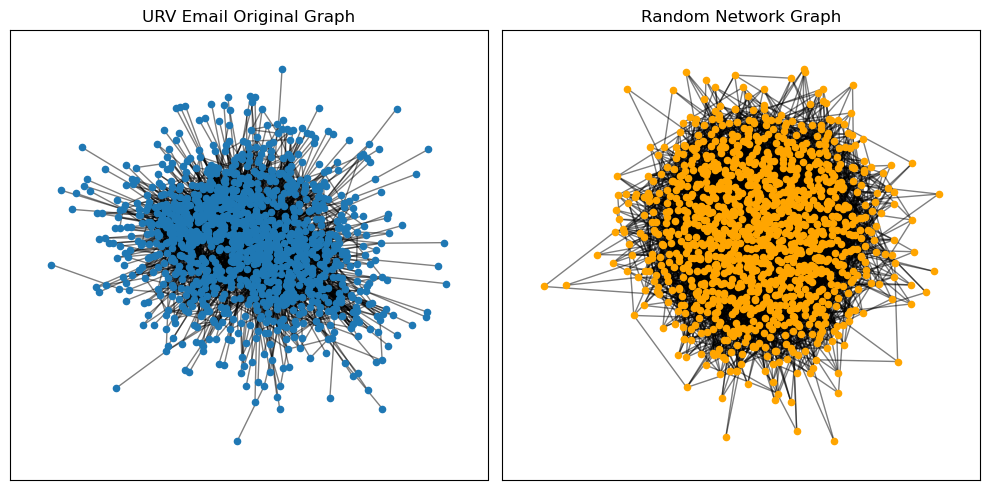

Number of nodes G network: 1133
Number of edges G network: 5451
Number of nodes in G random network: 1133
Number of edges in G random network: 5362


In [27]:
# For an Erdős-Rényi model
n = len(G.nodes())  # Number of nodes
p = 2 * len(G.edges()) / (n * (n - 1))  # Probability of connection 
G_random = nx.erdos_renyi_graph(n, p, seed=43)# Plotting and set the seed number to 43 
plt.figure(figsize=(10, 5))

# Plot original graph G
plt.subplot(1, 2, 1)
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("URV Email Original Graph")

# Plot Erdős-Rényi model graph G_random
plt.subplot(1, 2, 2)
pos_random = nx.spring_layout(G_random)  # positions for all nodes in the random graph
nx.draw_networkx_nodes(G_random, pos_random, node_color='orange', node_size=20)
nx.draw_networkx_edges(G_random, pos_random, alpha=0.5)
plt.title("Random Network Graph")

plt.tight_layout()
plt.show()

# Calculate some basic properties of the network
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes G network: {num_nodes}")
print(f"Number of edges G network: {num_edges}") 

# Calculate some basic properties of the random network
num_nodes_random = G_random.number_of_nodes()
num_edges_random = G_random.number_of_edges()
print(f"Number of nodes in G random network: {num_nodes_random}")
print(f"Number of edges in G random network: {num_edges_random}") 

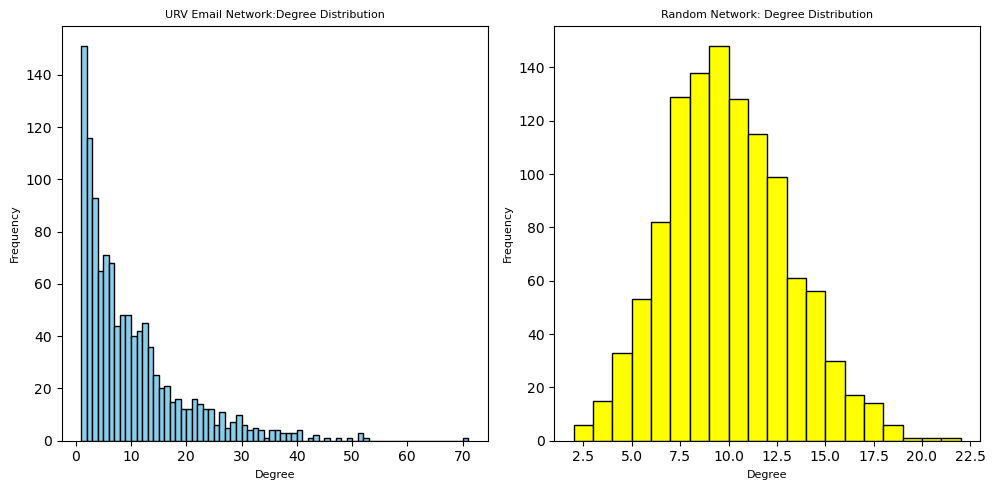

In [28]:
# Calculate the degree of each node
degrees = [deg for node, deg in G.degree()]
degrees_random = [deg for node, deg in G_random.degree()]

# Plot the degree distribution of G as a histogram
plt.figure(figsize=(10, 5))  # Adjusting figure size for better visibility
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), color='skyblue', edgecolor='black')
plt.title("URV Email Network:Degree Distribution",fontsize=8)
plt.xlabel("Degree", fontsize=8)  # Set the fontsize for x-axis label
plt.ylabel("Frequency", fontsize=8)  # Set the fontsize for y-axis label

# Plot the degree distribution of G_random as a histogram
plt.subplot(1, 2, 2)
plt.hist(degrees_random, bins=range(min(degrees_random), max(degrees_random) + 1), color='yellow', edgecolor='black')
plt.title("Random Network: Degree Distribution",fontsize=8)
plt.xlabel("Degree", fontsize=8)  # Set the fontsize for x-axis label
plt.ylabel("Frequency", fontsize=8)  # Set the fontsize for y-axis label

plt.tight_layout()
plt.show()

In [4]:
# Calculating centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)   

# Identifying top 5 nodes for each centrality measure
top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

top_5_degree, top_5_betweenness, top_5_closeness, top_5_eigenvector

([(105, 0.0627208480565371),
  (333, 0.045936395759717315),
  (16, 0.045053003533568906),
  (23, 0.045053003533568906),
  (42, 0.045053003533568906)],
 [(333, 0.03948985782790013),
  (105, 0.03693124853317947),
  (23, 0.033462977666082847),
  (578, 0.03155662746086827),
  (76, 0.030117501315083377)],
 [(333, 0.3828204261075414),
  (23, 0.38165879973027644),
  (105, 0.37821583695289007),
  (42, 0.3775850567044696),
  (41, 0.3749585955614442)],
 [(105, 0.22910279788672006),
  (16, 0.16529564953404924),
  (196, 0.15424720604912348),
  (204, 0.13488283795659883),
  (42, 0.1315701063095283)])

In [5]:
# Centrality measures for G_random
degree_centrality_random = nx.degree_centrality(G_random)
betweenness_centrality_random = nx.betweenness_centrality(G_random)
closeness_centrality_random = nx.closeness_centrality(G_random)
eigenvector_centrality_random = nx.eigenvector_centrality(G_random)

# Identifying top 5 nodes for each centrality measure in G_random
top_5_degree_random = sorted(degree_centrality_random.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_betweenness_random = sorted(betweenness_centrality_random.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_closeness_random = sorted(closeness_centrality_random.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_eigenvector_random = sorted(eigenvector_centrality_random.items(), key=lambda x: x[1], reverse=True)[:5]

top_5_degree_random, top_5_betweenness_random, top_5_closeness_random, top_5_eigenvector_random

([(698, 0.019434628975265017),
  (873, 0.01678445229681979),
  (111, 0.015901060070671377),
  (119, 0.015901060070671377),
  (155, 0.015901060070671377)],
 [(698, 0.009937441149383512),
  (873, 0.006779258321724139),
  (490, 0.0066633540354435255),
  (641, 0.006560631509203561),
  (111, 0.006487707975764269)],
 [(698, 0.3395320935812837),
  (1113, 0.3310909622696695),
  (490, 0.3296447291788002),
  (873, 0.3296447291788002),
  (119, 0.3285921625544267)],
 [(698, 0.07179839722270907),
  (14, 0.06227838710166536),
  (119, 0.061919982448597054),
  (490, 0.06164321785444607),
  (873, 0.06042175220453199)])

In [6]:
# Create a DataFrame from the top centrality measures
top_nodes = set([node for node, _ in top_5_degree] + [node for node, _ in top_5_betweenness] + [node for node, _ in top_5_closeness])
centrality_data = {
    'Node': list(top_nodes),
    'Degree Centrality': [degree_centrality[node] for node in top_nodes],
    'Betweenness Centrality': [betweenness_centrality[node] for node in top_nodes],
    'Closeness Centrality': [closeness_centrality[node] for node in top_nodes],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in top_nodes]
}

centrality_df = pd.DataFrame(centrality_data)
centrality_df.set_index('Node', inplace=True)

# Sort by Degree Centrality for demonstration
centrality_df.sort_values(by='Degree Centrality', ascending=False, inplace=True)

centrality_df

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
Node,,,,
105,0.062721,0.036931,0.378216,0.229103
333,0.045936,0.039490,0.382820,0.123657
42,0.045053,0.026024,0.377585,0.131570
16,0.045053,0.017843,0.346601,0.165296
23,0.045053,0.033463,0.381659,0.116593
41,0.043286,0.026499,0.374959,0.104180
76,0.037986,0.030118,0.374339,0.082444
578,0.032686,0.031557,0.359822,0.053080


In [7]:
# Create a DataFrame from the top centrality measures for the random network (G_random).
top_nodes_random = set([node for node, _ in top_5_degree_random] + [node for node, _ in top_5_betweenness_random] + [node for node, _ in top_5_closeness_random])
centrality_data_random = {
    'Node': list(top_nodes_random),
    'Degree Centrality': [degree_centrality_random[node] for node in top_nodes_random],
    'Betweenness Centrality': [betweenness_centrality_random[node] for node in top_nodes_random],
    'Closeness Centrality': [closeness_centrality_random[node] for node in top_nodes_random],
    'Eigenvector Centrality': [eigenvector_centrality_random[node] for node in top_nodes_random] # Fixed the key here
}

centrality_df_random = pd.DataFrame(centrality_data_random)
centrality_df_random.set_index('Node', inplace=True)

# Sort by Degree Centrality for demonstration
centrality_df_random.sort_values(by='Degree Centrality', ascending=False, inplace=True)

centrality_df_random

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
Node,,,,
698,0.019435,0.009937,0.339532,0.071798
873,0.016784,0.006779,0.329645,0.060422
490,0.015901,0.006663,0.329645,0.061643
111,0.015901,0.006488,0.326413,0.050770
119,0.015901,0.005704,0.328592,0.061920
155,0.015901,0.006031,0.321957,0.053839
641,0.015018,0.006561,0.326319,0.053022
1113,0.015018,0.005989,0.331091,0.058059


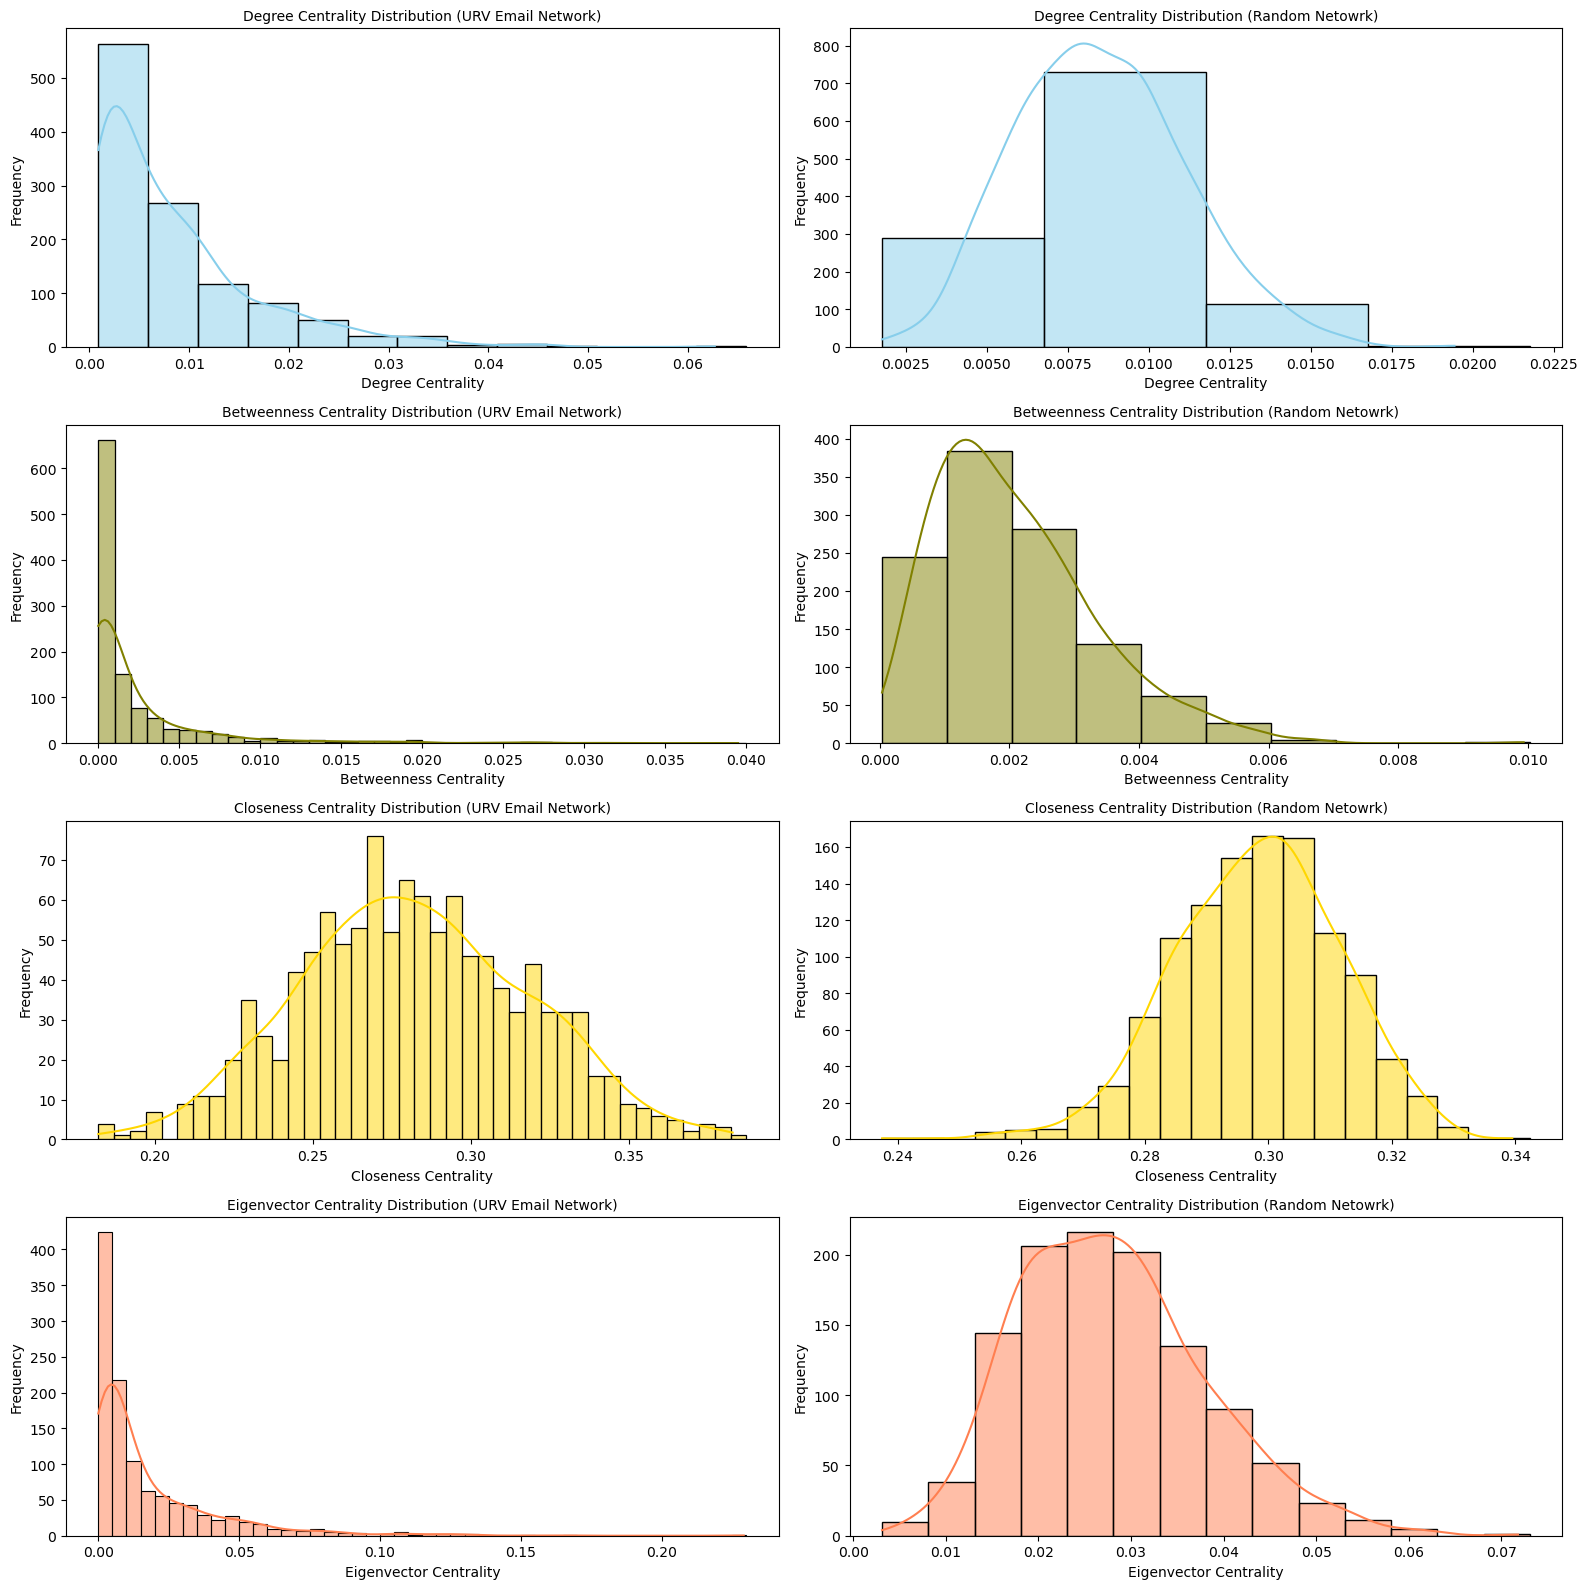

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert centrality dictionaries to lists for plotting
degree_values = list(degree_centrality.values())
betweenness_values = list(betweenness_centrality.values())
closeness_values = list(closeness_centrality.values())
eigenvector_values = list(eigenvector_centrality.values())
degree_values_random = list(degree_centrality_random.values())
betweenness_values_random = list(betweenness_centrality_random.values())
closeness_values_random = list(closeness_centrality_random.values())
eigenvector_values_random = list(eigenvector_centrality_random.values())

# Setting up the matplotlib figure 
fig, axs = plt.subplots(4, 2, figsize=(16, 16))

# Original Network
# Degree Centrality Distribution
sns.histplot(degree_values, ax=axs[0, 0], color="skyblue", kde=True, binwidth=0.005)
axs[0, 0].set_title('Degree Centrality Distribution (URV Email Network)', fontsize=10)
axs[0, 0].set_xlabel('Degree Centrality', fontsize=10)
axs[0, 0].set_ylabel('Frequency', fontsize=10)

# Betweenness Centrality Distribution
sns.histplot(betweenness_values, ax=axs[1, 0], color="olive", kde=True, binwidth=0.001)
axs[1, 0].set_title('Betweenness Centrality Distribution (URV Email Network)', fontsize=10)
axs[1, 0].set_xlabel('Betweenness Centrality', fontsize=10)
axs[1, 0].set_ylabel('Frequency', fontsize=10)

# Closeness Centrality Distribution
sns.histplot(closeness_values, ax=axs[2, 0], color="gold", kde=True, binwidth=0.005)
axs[2, 0].set_title('Closeness Centrality Distribution (URV Email Network)', fontsize=10)
axs[2, 0].set_xlabel('Closeness Centrality', fontsize=10)
axs[2, 0].set_ylabel('Frequency', fontsize=10)

# Eigenvector Centrality Distribution
sns.histplot(eigenvector_values, ax=axs[3, 0], color="coral", kde=True, binwidth=0.005)
axs[3, 0].set_title('Eigenvector Centrality Distribution (URV Email Network)', fontsize=10)
axs[3, 0].set_xlabel('Eigenvector Centrality', fontsize=10)
axs[3, 0].set_ylabel('Frequency', fontsize=10)

# Random Network
# Degree Centrality Distribution
sns.histplot(degree_values_random, ax=axs[0, 1], color="skyblue", kde=True, binwidth=0.005)
axs[0, 1].set_title('Degree Centrality Distribution (Random Netowrk)', fontsize=10)
axs[0, 1].set_xlabel('Degree Centrality', fontsize=10)
axs[0, 1].set_ylabel('Frequency', fontsize=10)

# Betweenness Centrality Distribution
sns.histplot(betweenness_values_random, ax=axs[1, 1], color="olive", kde=True, binwidth=0.001)
axs[1, 1].set_title('Betweenness Centrality Distribution (Random Netowrk)', fontsize=10)
axs[1, 1].set_xlabel('Betweenness Centrality', fontsize=10)
axs[1, 1].set_ylabel('Frequency', fontsize=10)

# Closeness Centrality Distribution
sns.histplot(closeness_values_random, ax=axs[2, 1], color="gold", kde=True, binwidth=0.005)
axs[2, 1].set_title('Closeness Centrality Distribution (Random Netowrk)', fontsize=10)
axs[2, 1].set_xlabel('Closeness Centrality', fontsize=10)
axs[2, 1].set_ylabel('Frequency', fontsize=10)

# Eigenvector Centrality Distribution
sns.histplot(eigenvector_values_random, ax=axs[3, 1], color="coral", kde=True, binwidth=0.005)
axs[3, 1].set_title('Eigenvector Centrality Distribution (Random Netowrk)', fontsize=10)
axs[3, 1].set_xlabel('Eigenvector Centrality', fontsize=10)
axs[3, 1].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

In [9]:
# Find all maximal cliques in the G graph
cliques = nx.find_cliques(G)
maximal_cliques = list(nx.find_cliques(G))
clique_sizes = defaultdict(int)
# Iterate over each clique and update counts
for clique in maximal_cliques:
    clique_sizes[len(clique)] += 1

# Print the number of cliques of each size
for size, count in clique_sizes.items():
    print(f"Size {size} cliques: {count}")

Size 7 cliques: 21
Size 6 cliques: 69
Size 5 cliques: 222
Size 3 cliques: 1178
Size 4 cliques: 545
Size 2 cliques: 1222
Size 8 cliques: 8
Size 12 cliques: 1
Size 9 cliques: 1


In [10]:
# Find all maximal cliques in the G_random graph
cliques_random = nx.find_cliques(G_random)
    
# Find all maximal cliques in the G_random graph
maximal_cliques_random = list(nx.find_cliques(G_random))

# Initialize defaultdict for counting clique sizes
clique_sizes_random = defaultdict(int)

# Iterate over each clique and update counts
for clique in maximal_cliques_random:
    clique_sizes_random[len(clique)] += 1

# Print the number of cliques of each size
for size, count in sorted(clique_sizes_random.items()):  # Sorting by size for clearer presentation
    print(f"Size {size} cliques in the random network: {count}")

Size 2 cliques in the random network: 5011
Size 3 cliques in the random network: 160


In [11]:
bridge_edges = list(nx.bridges(G))

# If you wanted to count bridges, you'd simply count the number of them
print(f"Total number of bridges: {len(bridge_edges)}")

Total number of bridges: 155


In [12]:
bridge_edges_random = list(nx.bridges(G_random))

# If you wanted to count bridges, you'd simply count the number of them
print(f"Total number of bridges: {len(bridge_edges_random)}")

Total number of bridges: 0


C:\Users\Giuse\AppData\Local\Temp\ipykernel_63492\3744484609.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
C:\Users\Giuse\AppData\Local\Temp\ipykernel_63492\3744484609.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Communities')


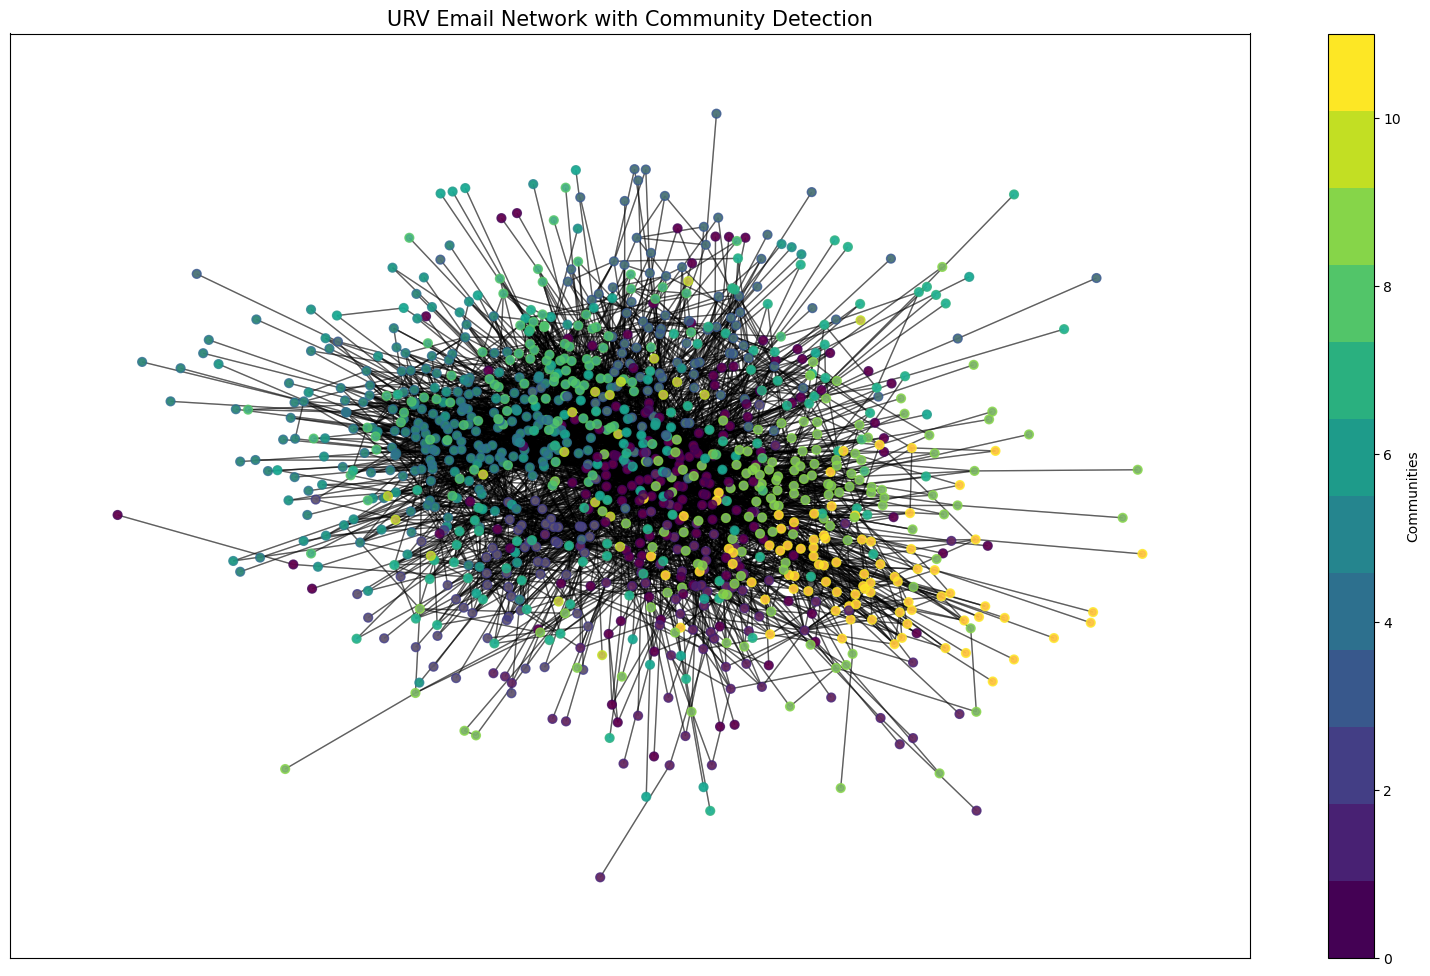

Total number of communities identified: 12
Modularity of the network: 0.5687846369387334


In [33]:
# Apply the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)

# Store the communities into a variable for later analysis
communities = {}
for node, community_id in partition.items():
    if community_id in communities:
        communities[community_id].append(node)
    else:
        communities[community_id] = [node]

# Visualization with communities colored
plt.figure(figsize=(20, 12))
# Generate a color palette with enough colors
cmap = plt.get_cmap('gist_rainbow', max(partition.values()) + 1)
# Draw the nodes and color them by their partition
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition.values()), alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="gray")

plt.title("URV Email Network with Community Detection", fontsize= 15)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=cmap, node_color=list(partition.values()), alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Create a color bar for the communities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(partition.values())))
sm.set_array([])
plt.colorbar(sm, label='Communities')
plt.show()

print("Total number of communities identified:",len(communities))
# Calculate and print the modularity of the partition
modularity = community_louvain.modularity(partition, G)
print(f"Modularity of the network: {modularity}")

In [14]:
community_map = partition
# Calculate betweenness centrality for all nodes in the network
betweenness_centrality = nx.betweenness_centrality(G)

# Identify inter-community edges
inter_community_edges = []
for edge in G.edges():
    node_a, node_b = edge
    # Check if nodes belong to different communities
    if community_map[node_a] != community_map[node_b]:
        inter_community_edges.append(edge)

# Identify potential bridge nodes based on betweenness centrality
# and their involvement in inter-community edges
bridge_nodes = set()
for edge in inter_community_edges:
    node_a, node_b = edge
    # Add nodes involved in inter-community edges to the set of bridge nodes
    bridge_nodes.add(node_a)
    bridge_nodes.add(node_b)

# Filter bridge nodes by their betweenness centrality scores
# Let's consider the top 10% as bridge nodes for simplicity
top_10_percent = sorted(betweenness_centrality.values(), reverse=True)[int(0.1 * len(betweenness_centrality))]
bridge_nodes_high_centrality = {node for node in bridge_nodes if betweenness_centrality[node] >= top_10_percent}

print("Total number of inter-community edges:",(len(inter_community_edges)))
print("Total number of bridge nodes with high centrality:", (len(bridge_nodes_high_centrality)))

Total number of inter-community edges: 1774
Total number of bridge nodes with high centrality: 114


In [15]:
# Counting intra-community edges by identifying edges where both nodes belong to the same community
intra_community_edges = [edge for edge in G.edges() if community_map[edge[0]] == community_map[edge[1]]]

# We already have the inter-community edges count from earlier analysis
inter_community_edge_count = len(inter_community_edges)
intra_community_edge_count = len(intra_community_edges)
total_edges = G.number_of_edges()

# Calculate proportions
proportion_intra_community_edges = intra_community_edge_count / total_edges
proportion_inter_community_edges = inter_community_edge_count / total_edges


print(f"Total number of intra-community edges:", intra_community_edge_count)
print(f"Total number of inter-community edges:", inter_community_edge_count)
print(f"Proportion of intra-community edges:", proportion_intra_community_edges)
print(f"Proportion of inter-community edges:", proportion_inter_community_edges)

Total number of intra-community edges: 3677
Total number of inter-community edges: 1774
Proportion of intra-community edges: 0.6745551274995414
Proportion of inter-community edges: 0.3254448725004586


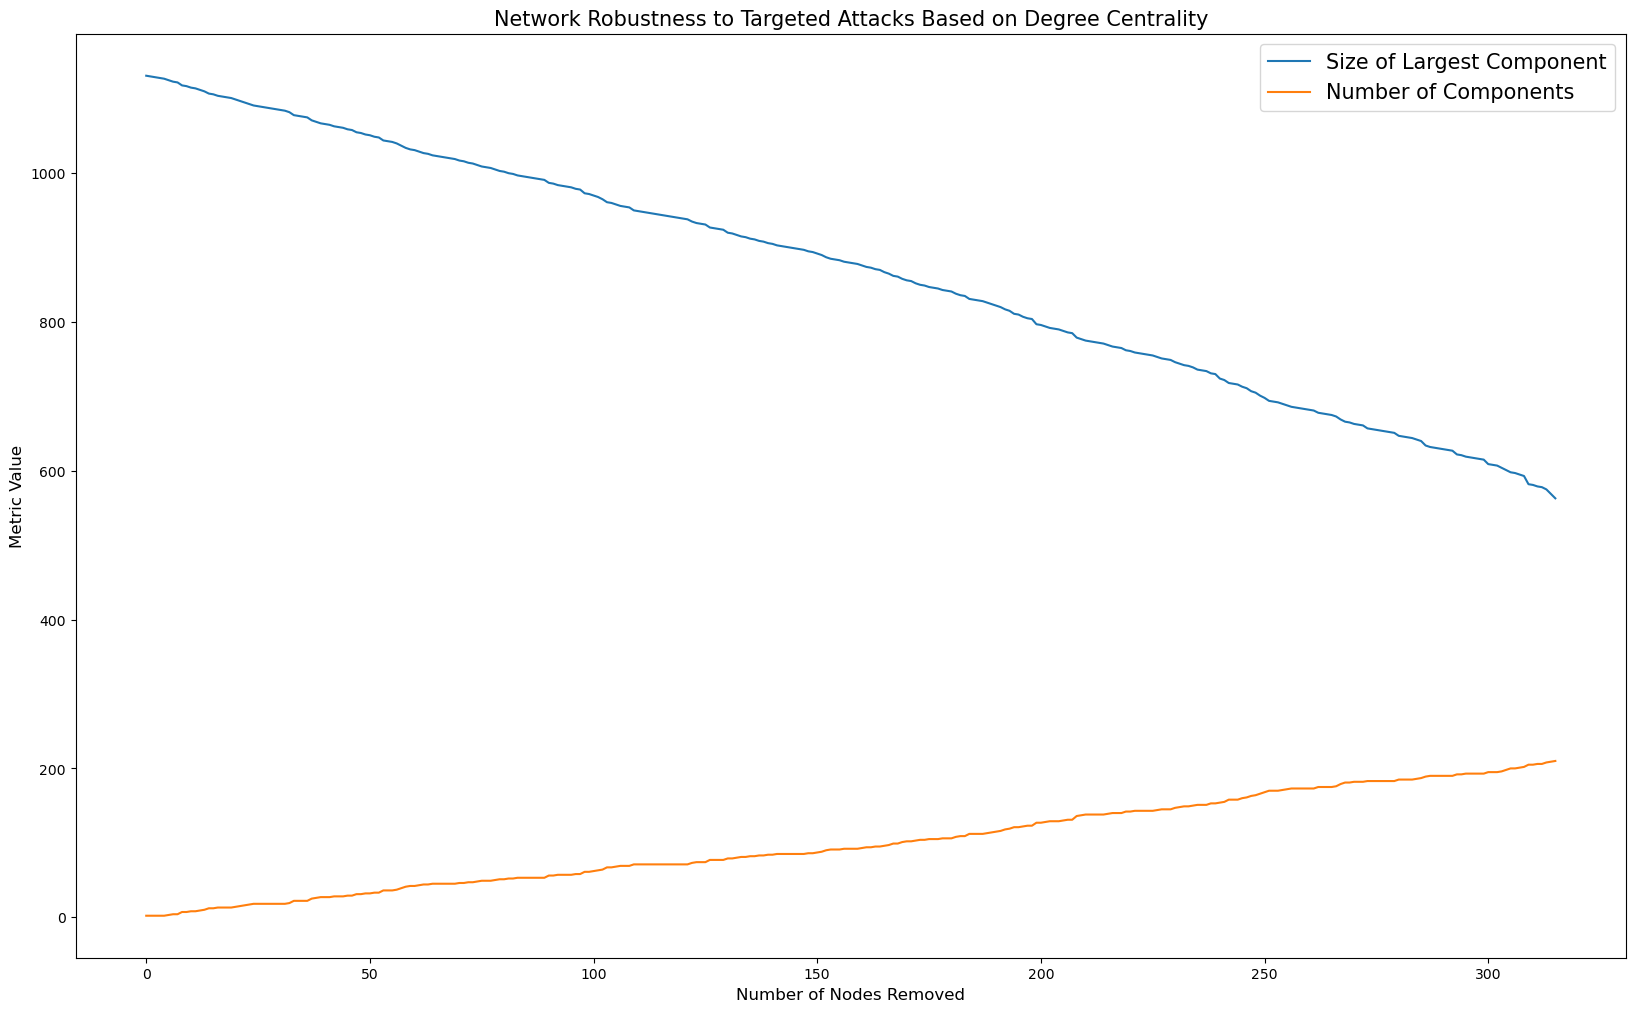

In [37]:
# Assuming G is your original graph
G_copy = G.copy()

# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(G_copy)

# Sort nodes by degree centrality in descending order
sorted_nodes_by_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Lists to keep track of metrics after each removal
largest_component_size = []
number_of_components = []

# Remove nodes one by one based on degree centrality
for node, _ in sorted_nodes_by_degree:
    # Remove node
    G_copy.remove_node(node)
    
    # Compute metrics
    components = list(nx.connected_components(G_copy))
    largest_component_size.append(len(max(components, key=len)))
    number_of_components.append(len(components))
    
    # Optionally, stop if the network has disintegrated significantly
    if len(max(components, key=len)) < len(G) / 2:  # Adjust condition based on your criteria
        break

# Plotting the impact on the network
plt.figure(figsize=(20, 12))
plt.plot(largest_component_size, label='Size of Largest Component')
plt.plot(number_of_components, label='Number of Components')
plt.xlabel('Number of Nodes Removed', fontsize= 12)
plt.ylabel('Metric Value', fontsize= 12)
plt.legend(fontsize= 15)
plt.title('Network Robustness to Targeted Attacks Based on Degree Centrality', fontsize= 15)
plt.show()